# 1. Supervised, Semi-Supervised, and Unsupervised Learning

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,hinge_loss,matthews_corrcoef,hamming_loss,jaccard_similarity_score,accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,hinge_loss,matthews_corrcoef,hamming_loss,jaccard_similarity_score,accuracy_score

# 1.a. Reading the data and splitting it into test and train

In [2]:
data = pd.read_csv('wdbc.data',header=None,delimiter=',')

In [4]:
data.rename(columns={0: 'ID', 1: 'Class'}, inplace=True)

In [97]:
data.head()

,ID,Class,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Grouping the dataframe by Class

In [699]:
data.groupby('Class').size()

Class
B    357
M    212
dtype: int64

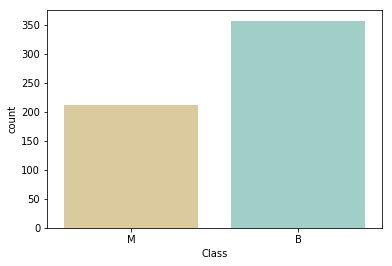

In [702]:
sns.countplot(x='Class', data=data, palette='BrBG')

In [6]:
for name,group in data.groupby(['Class']):
    print(name)
    print(type(group))

B
<class 'pandas.core.frame.DataFrame'>
M
<class 'pandas.core.frame.DataFrame'>


In [7]:
classes = list(data.groupby(['Class']))

In [8]:
neg_class = classes[0][1]
pos_class = classes[1][1]

In [9]:
pos_class.head()

,ID,Class,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
neg_class.head()

,ID,Class,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


### Splitting first 20% of each class as test and remaining as train

In [11]:
test_pos, train_pos = train_test_split(pos_class, test_size=0.8, shuffle=False)

In [12]:
train_pos.head()

,ID,Class,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
47,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,...,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.11790
53,857392,M,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,...,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987
54,857438,M,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,...,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873
56,857637,M,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
57,857793,M,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,...,17.87,30.70,115.7,985.5,0.1368,0.4290,0.3587,0.1834,0.3698,0.10940


In [13]:
test_pos.head()

,ID,Class,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
test_neg, train_neg = train_test_split(neg_class, test_size=0.8, shuffle=False)

In [15]:
test_neg.head()

,ID,Class,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [16]:
train_neg.head()

,ID,Class,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
154,8711002,B,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.034830,...,14.77,20.50,97.67,677.3,0.14780,0.22560,0.30090,0.09722,0.3849,0.08633
155,8711003,B,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.023310,...,13.59,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
157,8711216,B,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.027710,...,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
158,871122,B,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.019630,...,13.14,18.41,84.08,532.8,0.12750,0.12320,0.08636,0.07025,0.2514,0.07898
159,871149,B,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,...,12.36,18.20,78.07,470.0,0.11710,0.08294,0.01854,0.03953,0.2738,0.07685


In [17]:
train = pd.concat([train_pos,train_neg])

In [18]:
train.shape

(456, 32)

In [19]:
test = pd.concat([test_pos,test_neg])

In [20]:
test.shape

(113, 32)

# 1.b. Monte-Carlo Simulation

## i. Supervised Learning

### Splitting data to X and y

In [21]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [334]:
train_X = pd.concat([train.iloc[:,:1],train.iloc[:,2:32]], axis=1)
train_y = train.iloc[:,1:2]

In [23]:
train_X.head()

,ID,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
47,85715,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.11790
53,857392,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,...,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987
54,857438,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,...,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873
56,857637,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
57,857793,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,...,17.87,30.70,115.7,985.5,0.1368,0.4290,0.3587,0.1834,0.3698,0.10940


In [24]:
train_y.head()

,Class
47,M
53,M
54,M
56,M
57,M


In [25]:
test_X = pd.concat([test.iloc[:,:1],test.iloc[:,2:32]], axis=1)
test_y = test.iloc[:,1:2]

In [26]:
test_X.head()

,ID,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
test_y.head()

,Class
0,M
1,M
2,M
3,M
4,M


In [28]:
C_range = np.logspace(-5, 9, 15)
C_range

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])

In [29]:
kf = KFold(n_splits=5)

In [30]:
param = dict(C=C_range)

In [31]:
l1_svm = LinearSVC(penalty='l1', random_state=0,loss='squared_hinge', dual=False)

## SVM with 5-fold CV for C

In [335]:
warnings.filterwarnings('ignore')
l1_grids = GridSearchCV(l1_svm, param_grid=param, cv=kf)
l1_grids.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [336]:
prediction = l1_grids.predict(test_X)

In [337]:
prediction_train = l1_grids.predict(train_X)

### Confusion Matrix in one of the runs - Train Data

In [338]:
confusion_matrix(train_y,prediction_train)

array([[284,   2],
       [  5, 165]])

### ROC in one of the runs - Train Data

In [339]:
prediction_train = [1 if x=='M' else 0 for x in prediction_train ]
train_y = [1 if x=='M' else 0 for x in np.array(train_y)]

In [340]:
len(prediction_train)

456

In [341]:
len(train_y)

456

In [342]:
from sklearn import metrics
prediction = l1_grids.predict(train_X)
prediction.shape
fpr, tpr, _  = metrics.roc_curve(train_y,prediction_train)
print(fpr,tpr)

[0.         0.00699301 1.        ] [0.         0.97058824 1.        ]


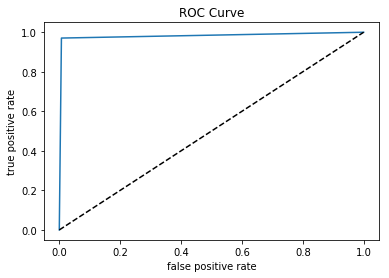

In [343]:
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

### Confusion Matrix in one of the runs - Test Data

In [88]:
confusion_matrix(test_y1,prediction1)

array([[68,  3],
       [ 2, 40]])

### ROC in one of the runs - Test Data

In [84]:
prediction1 = [1 if x=='M' else 0 for x in prediction ]

In [85]:
test_y1 = []
test_y1 = [1 if x=='M' else 0 for x in np.array(test_y)]

In [86]:
from sklearn import metrics
prediction = l1_grids.predict(test_X)
prediction.shape
fpr, tpr, _  = metrics.roc_curve(test_y1,prediction1)
print(fpr,tpr)

[0.         0.04225352 1.        ] [0.         0.95238095 1.        ]


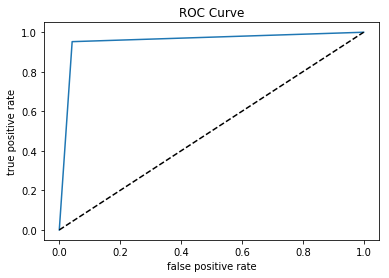

In [87]:
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

## Classification Report

In [89]:
print(classification_report(test_y1,prediction1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        42

   micro avg       0.96      0.96      0.96       113
   macro avg       0.95      0.96      0.95       113
weighted avg       0.96      0.96      0.96       113



### Normalizing the data

In [90]:
from sklearn.preprocessing import normalize

In [91]:
neg_class_X = neg_class.iloc[:,2:32]
neg_class_y = neg_class['Class']

In [92]:
pos_class_X = pos_class.iloc[:,2:32]
pos_class_y = pos_class['Class']

In [93]:
pos_class_norm = normalize(pos_class_X)
neg_class_norm = normalize(neg_class_X)

In [94]:
pos_class_norm = pd.DataFrame(pos_class_norm)
pos_class_norm['Class'] = 'M'
pos_class_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Class
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,...,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052,M
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,...,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038,M
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,...,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042,M
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,...,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247,M
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,...,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037,M


In [95]:
neg_class_norm = pd.DataFrame(neg_class_norm)
neg_class_norm['Class'] = 'B'
neg_class_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Class
0,0.014724,0.015616,0.095108,0.615820,0.000106,0.000088,0.000072,0.000052,0.000205,0.000063,...,0.020944,0.108418,0.773391,0.000157,0.000193,0.000260,0.000140,0.000324,0.000079,B
1,0.015795,0.018971,0.103404,0.627938,0.000130,0.000153,0.000055,0.000038,0.000238,0.000082,...,0.024743,0.116036,0.761375,0.000158,0.000335,0.000228,0.000088,0.000384,0.000099,B
2,0.022222,0.029087,0.141086,0.640428,0.000239,0.000152,0.000069,0.000049,0.000424,0.000161,...,0.036616,0.152286,0.736294,0.000310,0.000268,0.000207,0.000146,0.000573,0.000182,B
3,0.016996,0.024027,0.107755,0.683236,0.000117,0.000049,0.000033,0.000038,0.000191,0.000076,...,0.029753,0.110168,0.712063,0.000127,0.000060,0.000063,0.000065,0.000259,0.000080,B
4,0.025131,0.051636,0.158557,0.619080,0.000264,0.000182,0.000049,0.000018,0.000542,0.000199,...,0.067335,0.175575,0.742651,0.000398,0.000416,0.000211,0.000079,0.000952,0.000227,B


## Test Data - M=30 Iterations

In [96]:
acc_sup = []
prec_sup = []
rec_sup = []
fscore_sup = []
roc_sup = []

for x in range(30):
    test_pos1, train_pos1 = train_test_split(pos_class_norm, test_size=0.8, shuffle=True)
    test_neg1, train_neg1 = train_test_split(neg_class_norm, test_size=0.8, shuffle=True)
    test1 = pd.concat([test_pos1,test_neg1])
    train1 = pd.concat([train_pos1,train_neg1])
    train1_x = train1.iloc[:,0:30]
    train1_y = train1['Class']
    test1_x = test1.iloc[:,0:30]
    test1_y = test1['Class']
    warnings.filterwarnings('ignore')
    l1_grids = GridSearchCV(l1_svm, param_grid=param, cv=kf)
    l1_grids.fit(train1_x,train1_y)
    prediction = l1_grids.predict(test1_x)
    acc_sup.append(accuracy_score(test1_y,prediction))
    x = precision_recall_fscore_support(test1_y,prediction,average='binary',pos_label='M')
    prec_sup.append(x[0])
    rec_sup.append(x[1])
    fscore_sup.append(x[2])
    prediction = [1 if x=='M' else 0 for x in prediction ]
    test1_y = [1 if x=='M' else 0 for x in test1_y]
    roc_sup.append(roc_auc_score(test1_y,prediction))

### Average Accuracy score over 30 iterations

In [98]:
np.mean(acc_sup)

0.9625368731563423

### Avg Precision Score

In [99]:
np.mean(prec_sup)

0.9573311656218185

### Avg Recall

In [100]:
np.mean(rec_sup)

0.9428571428571427

### Avg fscore

In [101]:
np.mean(fscore_sup)

0.9494591891437847

### Avg AUC

In [102]:
np.mean(roc_sup)

0.9585177733065058

## Train Data - M=30 iterations

In [103]:
acc_sup_train = []
prec_sup_train = []
rec_sup_train = []
fscore_sup_train = []
roc_sup_train = []

for x in range(30):
    test_pos1, train_pos1 = train_test_split(pos_class_norm, test_size=0.8, shuffle=True)
    test_neg1, train_neg1 = train_test_split(neg_class_norm, test_size=0.8, shuffle=True)
    test1 = pd.concat([test_pos1,test_neg1])
    train1 = pd.concat([train_pos1,train_neg1])
    train1_x = train1.iloc[:,0:30]
    train1_y = train1['Class']
    test1_x = test1.iloc[:,0:30]
    test1_y = test1['Class']
    warnings.filterwarnings('ignore')
    l1_grids = GridSearchCV(l1_svm, param_grid=param, cv=kf)
    l1_grids.fit(train1_x,train1_y)
    prediction_tr = l1_grids.predict(train1_x)
    acc_sup_train.append(accuracy_score(train1_y,prediction_tr))
    x = precision_recall_fscore_support(train1_y,prediction_tr,average='binary',pos_label='M')
    prec_sup_train.append(x[0])
    rec_sup_train.append(x[1])
    fscore_sup_train.append(x[2])
    prediction_tr = [1 if x=='M' else 0 for x in prediction_tr ]
    train1_y = [1 if x=='M' else 0 for x in train1_y]
    roc_sup_train.append(roc_auc_score(train1_y,prediction_tr))

### Average Accuracy score over 30 iterations

In [104]:
np.mean(acc_sup_train)

0.9849415204678361

### Avg Precision Score

In [105]:
np.mean(prec_sup_train)

0.9861623908996475

### Avg Recall

In [106]:
np.mean(rec_sup_train)

0.9733333333333332

### Avg fscore

In [107]:
np.mean(fscore_sup_train)

0.9796803187745952

### Avg AUC

In [108]:
np.mean(roc_sup_train)

0.9825874125874124

# 1.b.ii Semi-Supervised Learning

### Selecting 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. 

In [256]:
test_pos1, train_pos1 = train_test_split(pos_class_norm, test_size=0.8, shuffle=True)
test_neg1, train_neg1 = train_test_split(neg_class_norm, test_size=0.8, shuffle=True)    
test1 = pd.concat([test_pos1,test_neg1])
train1 = pd.concat([train_pos1,train_neg1])
train1_x = train1.iloc[:,0:30]
train1_y = train1['Class']
test1_x = test1.iloc[:,0:30]
test1_y = test1['Class']

In [257]:
unlabel, label = train_test_split(train1,test_size=0.5, random_state=0, stratify=Target)

In [258]:
Target = train1['Class']

In [259]:
unlabel.shape

(228, 31)

In [260]:
label.shape

(228, 31)

In [261]:
train1.shape

(456, 31)

In [262]:
train1.groupby('Class').count()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Class,,,,,,,,,,,,,,,,,,,,,
B,286,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286
M,170,170,170,170,170,170,170,170,170,170,...,170,170,170,170,170,170,170,170,170,170


In [263]:
label.groupby('Class').count()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Class,,,,,,,,,,,,,,,,,,,,,
B,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
M,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85


In [264]:
unlabel.groupby('Class').count()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Class,,,,,,,,,,,,,,,,,,,,,
B,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
M,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85


In [265]:
label.reset_index(inplace=True,drop=True)
unlabel.reset_index(inplace=True,drop=True)

In [266]:
label_x = label.iloc[:,0:30]
label_y = label['Class']

In [267]:
unlabel_x = unlabel.iloc[:,0:30]
unlabel_y = unlabel['Class']

In [268]:
label_x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,...,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
1,0.018770,0.049222,0.118438,0.646911,0.000125,0.000060,0.000000,0.000000,0.000178,0.000092,...,0.019977,0.064188,0.126014,0.736742,0.000155,0.000092,0.000000,0.000000,0.000262,0.000099
2,0.013218,0.013200,0.084959,0.598843,0.000079,0.000070,0.000041,0.000032,0.000136,0.000053,...,0.015466,0.016057,0.102270,0.788785,0.000109,0.000180,0.000193,0.000112,0.000278,0.000073
3,0.008846,0.007368,0.060625,0.642365,0.000053,0.000105,0.000156,0.000073,0.000097,0.000025,...,0.009491,0.008751,0.065987,0.756174,0.000062,0.000155,0.000212,0.000082,0.000118,0.000029
4,0.021266,0.026140,0.133735,0.630022,0.000202,0.000090,0.000000,0.000000,0.000416,0.000140,...,0.023192,0.030791,0.145287,0.748820,0.000269,0.000157,0.000000,0.000000,0.000678,0.000178


In [269]:
label_y.head()

0    M
1    B
2    B
3    M
4    B
Name: Class, dtype: object

# 1.b.ii.A & 1.b.ii.B

In [271]:
warnings.filterwarnings('ignore')
l1_grids = GridSearchCV(l1_svm, param_grid=param, cv=kf)
l1_grids.fit(label_x,label_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [272]:
l1_grids.best_params_

{'C': 1000000.0}

In [324]:
acc_unsup_train = []
prec_unsup_train = []
rec_unsup_train = []
fscore_unsup_train = []
roc_unsup_train = []

acc_unsup_test = []
prec_unsup_test = []
rec_unsup_test = []
fscore_unsup_test = []
roc_unsup_test = []


for x in range(30):
    test_pos1, train_pos1 = train_test_split(pos_class_norm, test_size=0.8, shuffle=True)
    test_neg1, train_neg1 = train_test_split(neg_class_norm, test_size=0.8, shuffle=True)
    test1 = pd.concat([test_pos1,test_neg1])
    train1 = pd.concat([train_pos1,train_neg1])
    train1_x = train1.iloc[:,0:30]
    train1_y = train1['Class']
    test1_x = test1.iloc[:,0:30]
    test1_y = test1['Class']
    warnings.filterwarnings('ignore')
    l1_grids = GridSearchCV(l1_svm, param_grid=param, cv=kf)
    l1_grids.fit(label_x,label_y)
    while len(unlabel_x)!=0:
        y = l1_grids.decision_function(unlabel_x)
        maxd = np.argmax(abs(y))
        unlabel_pred = pd.DataFrame(l1_grids.predict(unlabel_x.iloc[maxd:maxd+1,:]))
        label_y=label_y.append(unlabel_pred, ignore_index=True)
        label_x=label_x.append(unlabel_x.iloc[maxd:maxd+1,:], ignore_index=True)
        unlabel_x.drop(unlabel_x.index[maxd:maxd+1], inplace=True)
        l1_grids.fit(label_x,label_y)
    #print(unlabel_x)
    prediction_tr = l1_grids.predict(train1_x)
    acc_unsup_train.append(accuracy_score(train1_y,prediction_tr))
    x = precision_recall_fscore_support(train1_y,prediction_tr,average='binary',pos_label='M')
    prec_unsup_train.append(x[0])
    rec_unsup_train.append(x[1])
    fscore_unsup_train.append(x[2])
    prediction_tr = [1 if x=='M' else 0 for x in np.array(prediction_tr)]
    train1_y = [1 if x=='M' else 0 for x in np.array(train1_y)]
    roc_unsup_train.append(roc_auc_score(train1_y,prediction_tr))
    prediction = l1_grids.predict(test1_x)
    acc_unsup_test.append(accuracy_score(test1_y,prediction))
    x = precision_recall_fscore_support(test1_y,prediction,average='binary',pos_label='M')
    prec_unsup_test.append(x[0])
    rec_unsup_test.append(x[1])
    fscore_unsup_test.append(x[2])
    prediction = [1 if x=='M' else 0 for x in np.array(prediction)]
    test1_y = [1 if x=='M' else 0 for x in np.array(test1_y)]
    roc_unsup_test.append(roc_auc_score(test1_y,prediction))

In [286]:
label_x.shape

(456, 30)

In [304]:
unlabel_x.shape

(0, 30)

### Average Accuracy, Precision, Recall, F-score, and AUC for test sets over M=30 runs

In [308]:
print('Average Accuracy:',np.mean(acc_unsup_test))

Average Accuracy: 0.9781710914454277


In [309]:
print('Precision:',np.mean(prec_unsup_test))

Precision: 0.9871429921940416


In [310]:
print('Recall:',np.mean(rec_unsup_test))

Recall: 0.9539682539682537


In [311]:
print('F-score:',np.mean(fscore_unsup_test))

F-score: 0.9700490068797732


In [312]:
print('AUC:',np.mean(roc_unsup_test))

AUC: 0.9732282584395262


### Confusion Matrix for test set

In [325]:
confusion_matrix(test1_y,prediction)

array([[71,  0],
       [ 2, 40]])

### ROC Curve for test set

In [327]:
from sklearn import metrics
fpr, tpr, _  = metrics.roc_curve(test1_y,prediction)
print(fpr,tpr)

[0. 0. 1.] [0.         0.95238095 1.        ]


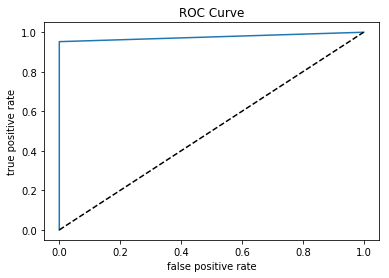

In [328]:
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

### Average Accuracy, Precision, Recall, F-score, and AUC for train sets over M=30 runs

In [313]:
print('Average Accuracy:',np.mean(acc_unsup_train))

Average Accuracy: 0.9834795321637427


In [314]:
print('Precision:',np.mean(prec_unsup_train))

Precision: 0.9852811820187127


In [315]:
print('Recall:',np.mean(rec_unsup_train))

Recall: 0.9701960784313726


In [316]:
print('F-score:',np.mean(fscore_unsup_train))

F-score: 0.9776673198239875


In [317]:
print('AUC:',np.mean(roc_unsup_train))

AUC: 0.9807856849033318


### Confusion matrix for train set

In [318]:
confusion_matrix(train1_y,prediction_tr)

array([[284,   2],
       [  6, 164]])

### ROC Curve for train set

In [319]:
from sklearn import metrics
prediction = l1_grids.predict(train1_x)
prediction.shape
fpr, tpr, _  = metrics.roc_curve(train1_y,prediction_tr)
print(fpr,tpr)

[0.         0.00699301 1.        ] [0.         0.96470588 1.        ]


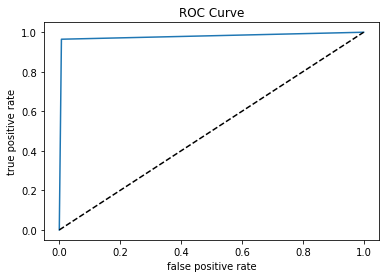

In [320]:
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

# 1.b.iii Unsupervised Learning

In [347]:
train1_x.shape

(456, 30)

In [346]:
test1_x.shape

(113, 30)

In [646]:
from sklearn.cluster import KMeans
import numpy as np
import scipy

In [931]:
acc_km_train = []
prec_km_train = []
rec_km_train = []
fscore_km_train = []
roc_km_train = []

acc_km_train1 = []
prec_km_train1 = []
rec_km_train1 = []
fscore_km_train1 = []
roc_km_train1 = []

acc_km_test = []
prec_km_test = []
rec_km_test = []
fscore_km_test = []
roc_km_test = []

for x in range(30):
    test_pos2, train_pos2 = train_test_split(pos_class_norm, test_size=0.8, shuffle=True)
    test_neg2, train_neg2 = train_test_split(neg_class_norm, test_size=0.8, shuffle=True)
    test2 = pd.concat([test_pos2,test_neg2])
    train2 = pd.concat([train_pos2,train_neg2])
    train2.reset_index(drop=True, inplace=True)
    test2.reset_index(drop=True, inplace=True)
    train2_x = train2.iloc[:,0:30]
    train2_y = train2['Class']
    test2_x = test2.iloc[:,0:30]
    test2_y = test2['Class']
    kmeans = KMeans(n_clusters=2, init = 'random').fit(train2_x)
    dist0 = {}
    for i in range(len(train2_x)):
        dist0[i] = scipy.spatial.distance.euclidean(kmeans.cluster_centers_[0],train2_x.iloc[i,:])
    values0 = list(dist0.values())
    values0.sort()
    values0 = values0[0:30]
    keys0 = [k for k,v in dist0.items() if v in values0]
    true0 = []
    for x in keys0:
        true0.append(train2_y[x])
    true0 = [1 if x=='M' else 0 for x in true0 ]
    cluster_0 = [1 if true0.count(1)> true0.count(0) else 0]
    labels = list(kmeans.labels_)
    pred_0 = [cluster_0] * labels.count(cluster_0)
    true_0 = train2['Class'][kmeans.labels_==cluster_0]
    true_0 = [1 if x=='M' else 0 for x in true_0 ]
    acc_km_train.append(accuracy_score(true_0,pred_0))
    x = precision_recall_fscore_support(true_0,pred_0,average='binary',pos_label=1)
    prec_km_train.append(x[0])
    rec_km_train.append(x[1])
    fscore_km_train.append(x[2])
    roc_km_train.append(roc_auc_score(true_0,pred_0))
    dist1 = {}
    for i in range(len(train2_x)):
        dist1[i] = scipy.spatial.distance.euclidean(kmeans.cluster_centers_[1],train2_x.iloc[i,:])
    values1 = list(dist1.values())
    values1.sort()
    values1 = values1[0:30]
    keys1 = [k for k,v in dist1.items() if v in values1]
    true1 = []
    for x in keys1:
        true1.append(train2_y[x])
    true1 = [1 if x=='M' else 0 for x in true1]
    cluster_1 = [1 if true0.count(1)> true0.count(0) else 0]
    labels = list(kmeans.labels_)
    pred_1 = [cluster_1] * labels.count(cluster_1)
    true_1 = train2['Class'][kmeans.labels_==cluster_1]
    true_1 = [1 if x=='M' else 0 for x in true_1 ]
    acc_km_train1.append(accuracy_score(true_1,pred_1))
    x = precision_recall_fscore_support(true_1,pred_1,average='binary',pos_label=1)
    prec_km_train1.append(x[0])
    rec_km_train1.append(x[1])
    fscore_km_train1.append(x[2])
    roc_km_train1.append(roc_auc_score(true_1,pred_1))
    test_pred = kmeans.predict(test2_x)
    test_pred = [cluster_0 if x==0 else cluster_1 for x in test_pred]
    test2_y = [1 if x=='M' else 0 for x in test2_y]
    acc_km_test.append(accuracy_score(test2_y,test_pred))
    x = precision_recall_fscore_support(test2_y,test_pred,average='binary',pos_label=1)
    prec_km_test.append(x[0])
    rec_km_test.append(x[1])
    fscore_km_test.append(x[2])
    roc_km_test.append(roc_auc_score(test2_y,test_pred))

# 1.b.iii.A Making sure that the algorithm was not trapped in a local minimum
### The number of samples assigned to each cluster kept changing in every kmeans since we have initialized the kmeans randomly which makes sure that the algorithm isnt trapped in a local minimum

# 1.b.iii.B 
### Average Accuracy, Precision, Recall, F-score, and AUC for train sets over M=30 runs

In [932]:
print('Accuracy:',np.mean(acc_km_train))

Accuracy: 0.5476000376316069


In [933]:
print('Precision:',np.mean(prec_km_train))

Precision: 0.058755167580888494


In [934]:
print('Recall:',np.mean(rec_km_train))

Recall: 0.43333333333333335


In [935]:
print('F-score:',np.mean(fscore_km_train))

F-score: 0.10339176578006755


In [936]:
print('AUC:',np.mean(roc_km_train))

AUC: 0.5


# 1.b.iii.C 
### Average Accuracy, Precision, Recall, F-score, and AUC for test sets over M=30 runs

In [937]:
print('Accuracy:',np.mean(acc_km_test))

Accuracy: 0.5171091445427728


In [938]:
print('Precision:',np.mean(prec_km_test))

Precision: 0.1610619469026549


In [939]:
print('Recall:',np.mean(rec_km_test))

Recall: 0.43333333333333335


In [940]:
print('F-score:',np.mean(fscore_km_test))

F-score: 0.23483870967741935


In [941]:
print('AUC:',np.mean(roc_km_test))

AUC: 0.5


In [736]:
kmeans = KMeans(n_clusters=2, init = 'random').fit(train1_x)

In [737]:
kmeans.cluster_centers_

array([[1.67763209e-02, 2.56893154e-02, 1.07969307e-01, 6.30249388e-01,
        1.32747405e-04, 1.18544844e-04, 7.31476225e-05, 3.82407813e-05,
        2.51524980e-04, 9.08945562e-05, 4.06032654e-04, 1.82686199e-03,
        2.90037894e-03, 3.01834894e-02, 1.08962327e-05, 3.26599927e-05,
        3.96701706e-05, 1.44750867e-05, 3.10007805e-05, 5.53184658e-06,
        1.84171383e-02, 3.36333986e-02, 1.20092898e-01, 7.55768770e-01,
        1.80161905e-04, 2.70806105e-04, 2.52250976e-04, 1.06436061e-04,
        3.90183119e-04, 1.15746305e-04],
       [1.05617442e-02, 1.36339461e-02, 6.94112456e-02, 5.51853126e-01,
        6.64656699e-05, 8.56046174e-05, 8.62585848e-05, 4.91593825e-05,
        1.22289588e-04, 4.07166304e-05, 3.45905115e-04, 7.24902144e-04,
        2.40020964e-03, 3.78334756e-02, 4.01519967e-06, 1.74458892e-05,
        2.21464715e-05, 8.56172797e-06, 1.16503504e-05, 2.28248196e-06,
        1.29786295e-02, 1.88309768e-02, 8.61667980e-02, 8.23152089e-01,
        9.45540312e-05,

In [746]:
train_pred = test_pred = kmeans.predict(train1_x)

### Confusion Matrix for train set

In [748]:
confusion_matrix(train1_y,train_pred)

array([[276,  10],
       [ 39, 131]])

In [749]:
from sklearn import metrics
fpr, tpr, _  = metrics.roc_curve(train1_y,train_pred)
print(fpr,tpr)

[0.         0.03496503 1.        ] [0.         0.77058824 1.        ]


### ROC Curve for train set

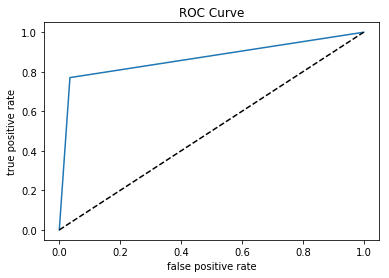

In [750]:
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

In [738]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [739]:
confusion_matrix(train1_y,kmeans.labels_)

array([[276,  10],
       [ 39, 131]])

In [740]:
accuracy_score(train1_y,kmeans.labels_)

0.8925438596491229

In [741]:
test_pred = kmeans.predict(test1_x)

In [742]:
accuracy_score(test1_y,test_pred)

0.9026548672566371

### Confusion Matrix for test set

In [743]:
confusion_matrix(test1_y,test_pred)

array([[71,  0],
       [11, 31]])

In [744]:
from sklearn import metrics
fpr, tpr, _  = metrics.roc_curve(test1_y,test_pred)
print(fpr,tpr)

[0. 0. 1.] [0.         0.73809524 1.        ]


### ROC Curve for test set

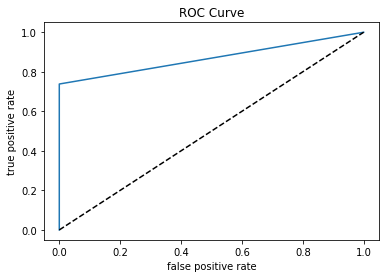

In [745]:
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

# 1.b.iv Spectral Clustering

### Spectral Clustering is a special clustering technique where different shapes of clusters can be formed, unlike the usual oval clusters

In [704]:
from sklearn.cluster import SpectralClustering

In [920]:
acc_sc_train = []
prec_sc_train = []
rec_sc_train = []
fscore_sc_train = []
roc_sc_train = []

acc_sc_train1 = []
prec_sc_train1 = []
rec_sc_train1 = []
fscore_sc_train1 = []
roc_sc_train1 = []

acc_sc_test = []
prec_sc_test = []
rec_sc_test = []
fscore_sc_test = []
roc_sc_test = []

for x in range(30):
    test_pos2, train_pos2 = train_test_split(pos_class_norm, test_size=0.8, shuffle=True)
    test_neg2, train_neg2 = train_test_split(neg_class_norm, test_size=0.8, shuffle=True)
    test2 = pd.concat([test_pos2,test_neg2])
    train2 = pd.concat([train_pos2,train_neg2])
    train2.reset_index(drop=True, inplace=True)
    test2.reset_index(drop=True, inplace=True)
    train2_x = train2.iloc[:,0:30]
    train2_y = train2['Class']
    test2_x = test2.iloc[:,0:30]
    test2_y = test2['Class']
    kmeans = SpectralClustering(n_clusters=2,assign_labels="discretize",random_state=0).fit(train2_x)
    true0 = train2['Class'][kmeans.labels_==0]
    true0 = [1 if x=='M' else 0 for x in true0 ]
    cluster_0 = [1 if true0.count(1)> true0.count(0) else 0]
    labels = list(kmeans.labels_)
    pred_0 = [cluster_0] * labels.count(cluster_0)
    true_0 = train2['Class'][kmeans.labels_==cluster_0]
    true_0 = [1 if x=='M' else 0 for x in true_0 ]
    acc_sc_train.append(accuracy_score(true_0,pred_0))
    x = precision_recall_fscore_support(true_0,pred_0,average='binary',pos_label=1)
    prec_sc_train.append(x[0])
    rec_sc_train.append(x[1])
    fscore_sc_train.append(x[2])
    roc_sc_train.append(roc_auc_score(true_0,pred_0))
    true1 = train2['Class'][kmeans.labels_==1]
    true1 = [1 if x=='M' else 0 for x in true1]
    cluster_1 = [1 if true0.count(1)>true0.count(0) else 0]
    labels = list(kmeans.labels_)
    pred_1 = [cluster_1] * labels.count(cluster_1)
    true_1 = train2['Class'][kmeans.labels_==cluster_1]
    true_1 = [1 if x=='M' else 0 for x in true_1 ]
    acc_sc_train1.append(accuracy_score(true_1,pred_1))
    x = precision_recall_fscore_support(true_1,pred_1,average='binary',pos_label=1)
    prec_sc_train1.append(x[0])
    rec_sc_train1.append(x[1])
    fscore_sc_train1.append(x[2])
    roc_sc_train1.append(roc_auc_score(true_1,pred_1))
    test_pred = kmeans.fit_predict(test2_x)
    test_pred = [cluster_0 if x==0 else cluster_1 for x in test_pred]
    test2_y = [1 if x=='M' else 0 for x in test2_y]
    acc_sc_test.append(accuracy_score(test2_y,test_pred))
    x = precision_recall_fscore_support(test2_y,test_pred,average='binary',pos_label=1)
    prec_sc_test.append(x[0])
    rec_sc_test.append(x[1])
    fscore_sc_test.append(x[2])
    roc_sc_test.append(roc_auc_score(test2_y,test_pred))

### Average Accuracy, Precision, Recall, F-score, and AUC for train sets over M=30 runs

In [964]:
print('Accuracy:',np.mean(acc_sc_train))

Accuracy: 0.8187628958800252


In [967]:
print('Precision:',np.mean(prec_sc_train))

Precision: 0.010109850089559782


In [969]:
print('Recall:',np.mean(rec_sc_train))

Recall: 0.1


In [970]:
print('F-score:',np.mean(fscore_sc_train))

F-score: 0.018357746558592573


In [973]:
print('AUC:',np.mean(roc_sc_train))

AUC: 0.5


### Average Accuracy, Precision, Recall, F-score, and AUC for test sets over M=30 runs

In [966]:
print('Accuracy:',np.mean(acc_sc_test))

Accuracy: 0.6026548672566373


In [965]:
print('Precision:',np.mean(prec_sc_test))

Precision: 0.03716814159292035


In [968]:
print('Recall:',np.mean(rec_sc_test))

Recall: 0.1


In [971]:
print('F-score:',np.mean(fscore_sc_test))

F-score: 0.054193548387096765


In [972]:
print('AUC:',np.mean(roc_sc_test))

AUC: 0.5


In [848]:
kmeans = SpectralClustering(n_clusters=2,assign_labels="discretize",random_state=0).fit(train2_x)

In [868]:
train2_x = train2.iloc[:,0:30]
train2_y = train2['Class']
test2_x = test2.iloc[:,0:30]
test2_y = test2['Class']

In [862]:
train_pred = kmeans.fit_predict(train2_x)

In [870]:
train2_y = [1 if x=='M' else 0 for x in train2_y ]

In [871]:
train2_x.shape

(456, 30)

### Confusion Matrix of train set

In [873]:
confusion_matrix(train2_y,train_pred)

array([[269,  17],
       [ 30, 140]])

### ROC Curve of train set

In [874]:
from sklearn import metrics
fpr, tpr, _  = metrics.roc_curve(train2_y,train_pred)
print(fpr,tpr)

[0.         0.05944056 1.        ] [0.         0.82352941 1.        ]


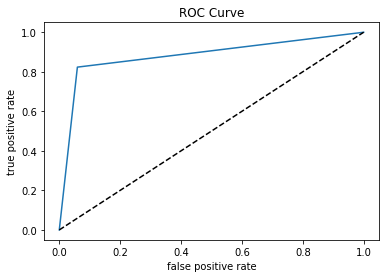

In [875]:
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

In [891]:
test_pred = kmeans.fit_predict(test2_x)

In [892]:
test2_y = [1 if x=='M' else 0 for x in test2_y ]

In [893]:
accuracy_score(test2_y,test_pred)

0.6637168141592921

### Confusion Matrix of test set

In [894]:
confusion_matrix(test2_y,test_pred)

array([[75, 38],
       [ 0,  0]])

### ROC Curve of test set

In [895]:
from sklearn import metrics
fpr, tpr, _  = metrics.roc_curve(test1_y,test_pred)
print(fpr,tpr)

[0.         0.04225352 1.        ] [0.         0.83333333 1.        ]


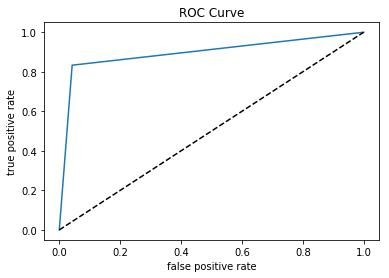

In [896]:
plt.plot(fpr, tpr, label='RF')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')

# 1.b.v The best performance was for "Semi-Supervised Learning" with an accuracy of 0.9781710914454277 and precision of 0.9871429921940416. Next comes the Supervised Learning with an accuracy of 0.9625368731563423 and precision of 0.9573311656218185. The worst performance was for Unsupervised Learning with an approx accuracy of 0.6026548672566373 and precision of 0.1610619469026549